In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [15]:
##initialize the datasets path
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

##set images in similar size(there may be have images in different resolutions)
img_width =180
img_height = 180

In [18]:
##import datasets as arrays which lay in the folders
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                         shuffle=True,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False)

data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        shuffle=True, 
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False)

data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                        shuffle=True, 
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


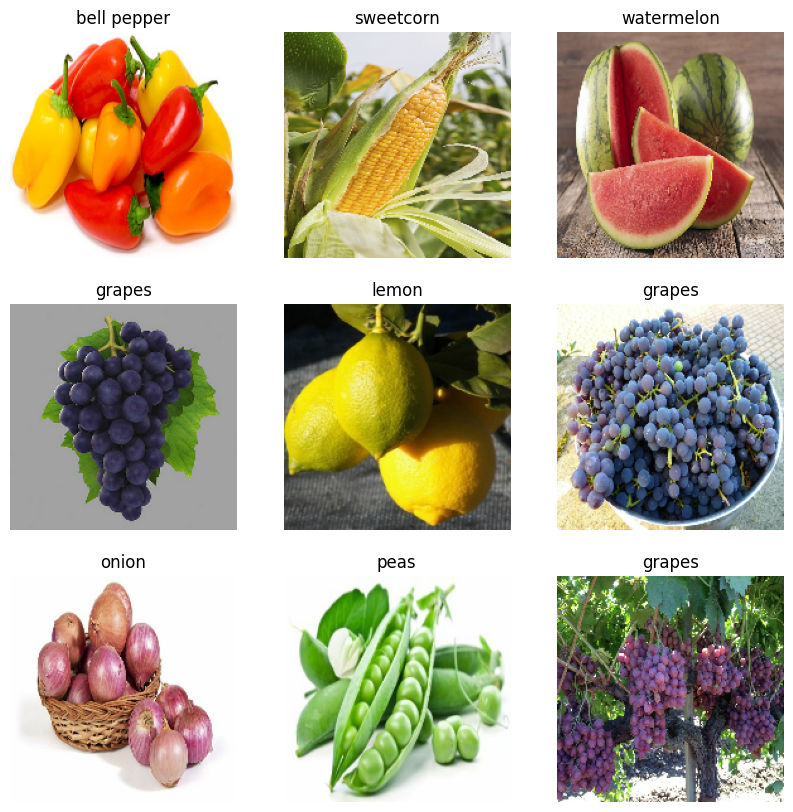

In [38]:
##See the different classnames in the directories
data_categories = data_train.class_names

##plot 09 images of the train dataset
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_categories[label[i]]) 
        plt.axis("off")

In [53]:
##Initiate the model
from tensorflow.keras.models import Sequential

model = Sequential([layers.Rescaling(1./255), 
                    layers.Conv2D(16, 3, padding='same',activation='relu'),##layer 1
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3,padding='same',activation='relu'),##layer2
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3 ,padding='same', activation='relu'),##layer3
                    layers.MaxPooling2D(),
                    layers.Flatten(), #Flattens the 3D output (height, width, channels) into a 1D vector.This is needed before feeding into Dense (fully connected) layers.
                    layers.Dropout(0.2),#Dropout randomly disables 20% of neurons during training to prevent overfitting.
                    layers.Dense(128),#Fully connected layer with 128 neurons.
                    layers.Dense(len(data_categories)) #number of neurons = number of classes.
                    ])
##layers.Rescaling(1./255)-divide every color by 255 (maximum pixel count) 
#layers.Conv2D(16, 3, padding='same',activation='relu')-convert layers into 2D by using 16 neurons 3 filters

In [54]:
##create the compile the model

#Optimizer: how the model learns
#Loss function: how the error is calculated
#Metrics: what performance metric to monitor during training
model.compile(optimizer='adam' ,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#Categorical Crossentropy is the loss function used for multi-class classification (when labels are one-hot encoded).
#from_logits=True means your model's output layer does not have a softmax (i.e., outputs raw logits).
# TensorFlow will apply softmax internally before computing the loss.

In [55]:

history = model.fit(data_train, validation_data=data_val, epochs=25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 317ms/step - accuracy: 0.0881 - loss: 3.4513 - val_accuracy: 0.3960 - val_loss: 2.1705
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.3282 - loss: 2.2984 - val_accuracy: 0.6239 - val_loss: 1.4219
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.5021 - loss: 1.7301 - val_accuracy: 0.7436 - val_loss: 0.8350
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.6657 - loss: 1.1375 - val_accuracy: 0.8832 - val_loss: 0.5275
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.8374 - loss: 0.5760 - val_accuracy: 0.9316 - val_loss: 0.3538
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.9047 - loss: 0.3650 - val_accuracy: 0.9316 - val_loss: 0.3738
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.9431 - loss: 0.2467 - val_accuracy: 0.9459 - val_loss: 0.3400
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.9603 - loss: 0.1933 - val_accu